# Линейные модели, SVM и деревья решений.

### Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.
Для выполения данной лаборторной работы мною был выбран датасет Credit Card Approvals (https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data).

In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from scipy.optimize import fmin_tnc
from IPython.display import Image
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
target_col = 'Approved'
%matplotlib inline 
sns.set(style="ticks")

### Подготовка данных

In [ ]:
data = pd.read_csv("clean_dataset.csv")

In [ ]:
data.shape

(690, 16)

In [ ]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


#### В столбце gender 0 - жен, 1 - муж, в столбце married 1 - замужем/женат, 0 - свободен/ свободна, bankCustomer 0 - не является клиентом, 1 - клиент, и так далее. Целевой признак - столбец approved

### Удаляем пустые значения и кодируем категориальные признаки

In [ ]:
data = data.dropna(axis=1, how='any')
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [ ]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Gender - int64 - 0
Age - float64 - 0
Debt - float64 - 0
Married - int64 - 0
BankCustomer - int64 - 0
Industry - object - 0
Ethnicity - object - 0
YearsEmployed - float64 - 0
PriorDefault - int64 - 0
Employed - int64 - 0
CreditScore - int64 - 0
DriversLicense - int64 - 0
Citizen - object - 0
ZipCode - int64 - 0
Income - int64 - 0
Approved - int64 - 0


In [ ]:
# категориальные признаки
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

Industry
Ethnicity
Citizen


In [ ]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
data['Industry'] = le1.fit_transform(data['Industry'])

In [ ]:
le2 = LabelEncoder()
data['Ethnicity'] = le2.fit_transform(data['Ethnicity'])

In [ ]:
le3 = LabelEncoder()
data['Citizen'] = le3.fit_transform(data['Citizen'])

In [ ]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

### Разделение выборки на обучающую и тестовую

In [ ]:

X = data.drop(target_col, axis=1)
Y = data[target_col]

In [ ]:
X

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,3,1,1.25,0,0,0,0,0,260,0
686,0,22.67,0.750,1,1,4,4,2.00,0,1,2,1,0,200,394
687,0,25.25,13.500,0,0,6,2,2.00,0,1,1,1,0,200,1
688,1,17.92,0.205,1,1,2,4,0.04,0,0,0,0,0,280,750


In [ ]:
Y

In [ ]:
pd.DataFrame(X, columns=X.columns).describe()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,5.531884,2.852174,2.223406,0.523188,0.427536,2.40000,0.457971,0.105797,180.547826,1017.385507
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.417236,1.491593,3.346513,0.499824,0.495080,4.86294,0.498592,0.343458,173.970323,5210.102598
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,3.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,60.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,5.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,160.000000,5.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,8.000000,4.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,272.000000,395.500000
max,1.000000,80.250000,28.000000,1.000000,1.000000,13.000000,4.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,2000.000000,100000.000000


#### Разделим выборку на обучающую и тестовую:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(517, 15), (173, 15)
(517,), (173,)


## Обучение моделей
### Линейная модель

In [ ]:
SGD = SGDClassifier(max_iter=10000)
SGD.fit(X_train, Y_train)

SGDClassifier(max_iter=10000)

In [ ]:
f1_score(Y_test, SGD.predict(X_test), average='micro')
precision_score(Y_test, SGD.predict(X_test), average='micro')

0.7167630057803468

### SVM

In [ ]:

from sklearn.svm import SVC
SVC = SVC(kernel='rbf')
SVC.fit(X_train, Y_train)

SVC()

In [ ]:
f1_score(Y_test, SVC.predict(X_test), average='micro')
precision_score(Y_test, SVC.predict(X_test), average='micro')

0.6705202312138728

### Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
f1_score(Y_test, DT.predict(X_test), average='micro')
precision_score(Y_test, DT.predict(X_test), average='micro')

0.7803468208092486

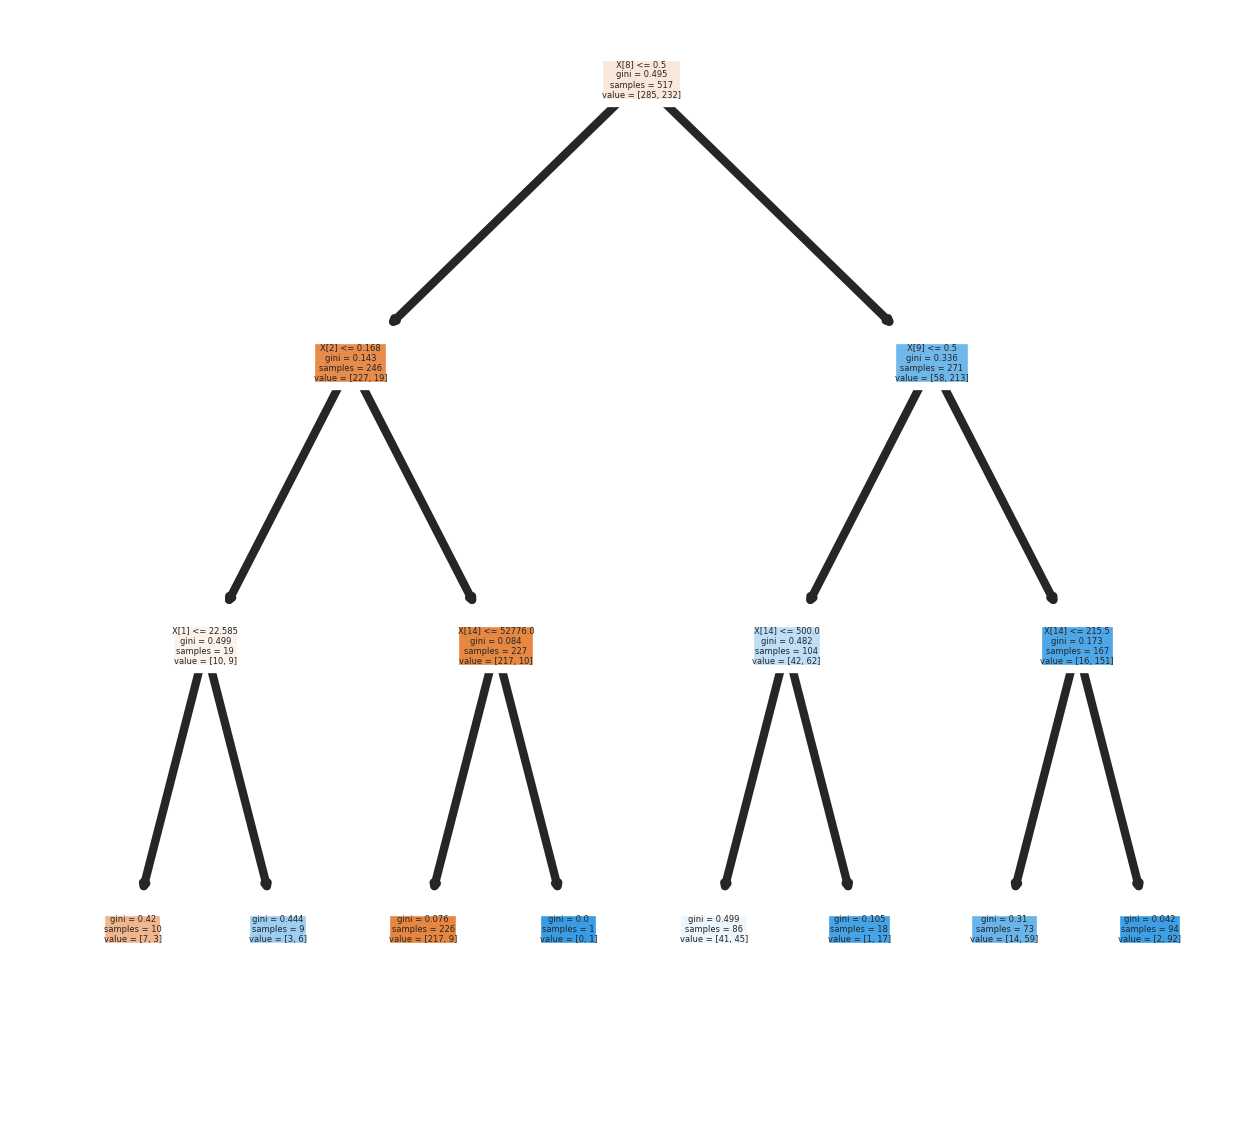

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (0.3,0.3), dpi=600)
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train, Y_train)
tree.plot_tree(clf, filled = True);